<a href="https://colab.research.google.com/github/briggsrr/BST-Movie-Sorter/blob/master/Homework_Assignment_4.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# CS/ECE 181: Homework Assignment #4

<small>v1.0.2</small>

**DUE DATE**: November 20, 11:59pm Pacific via GauchoSpace

* You can save a copy of this document in your own Drive and work on it in your own Colab
* When you're done, select "Download .ipynb" and drop the file in the Homework Assignment #2 folder on GauchoSpace.
* You can add comments, multiple cells, etc. Just make sure to explain what you did so that we can give you partial credit.
* Remember, you are expected to work alone. You can discuss a solution approach with your peers, but you must not copy their code. The implementation must be yours. If you google how to do stuff (or use open-source code or libraries) you must acknowledge your sources.

> **Note**: The goal is to implement the perceptron algorithm from scratch, meaning you should not be using scikit-learn's or OpenCV's perceptron classifiers. You can use other sklearn, OpenCV, and NumPy utility functions though. Also, feel free to add as many text/code cells as you like.

# 1. Perceptron: Binary Classification (15 pts)

In the 1950s, American psychologist and artificial intelligence researcher Frank Rosenblatt invented an algorithm that would learn a binary classifier called a threshold function:  a function that maps its input $\boldsymbol{x}$ (a real-valued vector) to an output value $\hat{y}$:

$$\begin{equation} \hat{y} = \begin{cases} 1 & \mathrm{if}\ \boldsymbol{w} \cdot \boldsymbol{x} + b > 0 \\ -1 & \mathrm{otherwise} \end{cases}, \end{equation} \hspace{1in} (1)$$

where $\boldsymbol{w}$ is a weight vector, $\cdot$ denotes the dot product, and $b$ is a bias term (scalar).
The bias shifts the decision boundary away from the origin and does not depend on any input value.

In the first section, we want to implement the perceptron algorithm from scratch and apply it to a binary classification problem.

## 1.1 Generating a Toy Dataset

To test our perceptron classifier, we need to generate some mock data.

Let's keep things simple for now and generate 100 data samples (`n_samples`) belonging to one of two blobs (`center`s), relying on scikit-learn's `make_blobs` function:

In [1]:
from sklearn.datasets import make_blobs
X, y = make_blobs(n_samples=100, centers=2, cluster_std=2.2, random_state=42)

We denote the feature matrix as `X` and the vector containing the target labels as `y`.
The feature matrix is typically of size (`n_samples` x `n_features`) and the target labels is a column vector with `n_samples` elements.

We can convince ourselves of that by looking at the shape of these two variables:

In [2]:
X.shape, y.shape

((100, 2), (100,))

Here, every feature (i.e., every row in `X`) has two feature values (i.e., an `x` value and a `y` coordinate). The target label for `X[i]` is in `y[i]`.

This means we can scatter-plot the data as follows to verify that there are two clusters of data points:

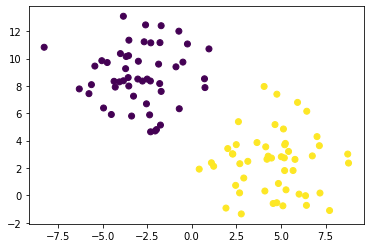

In [3]:
import matplotlib.pyplot as plt
plt.scatter(X[:, 0], X[:, 1], c=y)

To stay consistent with the lecture and Equation 1 above, we will work with target values $+1$ and $-1$ (as opposed to $1$ and $0$):

In [11]:
import numpy as np
y = np.where(y > 0, 1, -1)

[-1  1 -1  1  1 -1  1  1 -1 -1 -1  1 -1 -1  1  1  1  1  1 -1  1  1  1  1
  1 -1  1 -1  1  1 -1 -1 -1 -1 -1  1  1 -1 -1 -1 -1  1  1  1  1 -1 -1 -1
 -1  1  1 -1 -1  1 -1  1 -1  1  1 -1 -1  1 -1  1  1  1  1 -1  1  1 -1  1
  1  1  1  1  1 -1  1 -1  1 -1 -1 -1  1 -1 -1 -1  1 -1  1 -1 -1 -1 -1 -1
 -1  1 -1 -1]


## 1.2 Implementing the Perceptron Algorithm (15 pts)

Now we are ready to implement the perceptron. We need two functions:

- `predict`: Given a number of features $x_i$, we want to predict their labels $\hat{y}_i$ according to Equation 1

- `fit`: Given a number of features $x_i$ and their corresponding labels $y_i$, we want to run the perceptron algorithm to update a number of weights $w_j$ as well as a bias term. 

### 1.2.1 Predicting Labels (2 pts)

**TODO**: Implement Equation 1 in the `predict` function below.

In [19]:
def predict(X, weights, bias):
    """Predict the labels of X

    Parameters
    ----------
    X : NumPy array
        2D feature matrix of size (n_samples, n_features)
    weights : NumPy array
        weight vector of size (n_samples, 1)
    bias : float
        bias term

    Returns
    -------
    y_hat : NumPy array
        vector of target labels, one label per sample
    """
    y_hat = []
    for i in range(len(X)):
      out = np.dot(X[i], weights) + bias
      if(out > 0):
        y_d = 1
      else:
        y_d = -1
      y_hat.append(y_d);
    return np.array(y_hat)

### 1.2.2 Updating the Weights (8 pts)

**TODO**: Implement the perceptron algorithm using the `fit` function below.

As a reminder, the perceptron algorithm works as follows:

1. Initialize the weight vector $\boldsymbol{w}$ and the bias $b$ to zero.
2. Start with the first sample $\boldsymbol{x}_0$. Predict its target label $\hat{\boldsymbol{y}}_0$ and compare it to the ground-truth label $\boldsymbol{y}_0$.
   a. If the prediction was correct, do nothing.
   b. If the prediction is wrong, update the weights and bias:

      $$\delta_0 = \eta (\boldsymbol{y}_0 - \hat{\boldsymbol{y}}_0)$$
   
      $$\boldsymbol{w} \rightarrow \boldsymbol{w} + \delta_0 \boldsymbol{x}_0$$

      $$b \rightarrow b + \delta_0$$

      where $\eta$ is the learning rate.
3. Repeat for all samples.
4. Repeat for a number of iterations `n_iter`.

In [20]:
def fit(X, y, eta, n_iter):
    """Train a perceptron on X

    Parameters
    ----------
    X : NumPy array
        2D feature matrix of size (n_samples, n_features)
    y : NumPy array
        vector of target labels of size (n_samples, )
    eta : float
        learning rate
    n_iter : int
        number of iterations

    Returns
    -------
    weights : NumPy array
        vector of learned weights of size (n_features, )
    bias : float
        learned bias
    """

    n_samples, n_features = X.shape
    weights = np.zeros(n_features)
    bias = 0
    
    for x in range(n_iter):
      for index, x_i in enumerate(X):
        out = np.dot(x_i,weights) + bias
        if(out > 0):
          y_pred = 1
        else:
          y_pred = -1
        
        update = eta * (y[index] - y_pred)
        weights += update * x_i
        bias += update 

    return weights, bias

### 1.2.3 Fit the Perceptron to the Toy Data (2 pts)

**TODO**: Now we have all the pieces in place to train our perceptron. Use your `fit` method from above to do that.

You'll want to experiment with the possible values for `eta` and `n_iter` above. A good starting point might be `eta=0.1` and `n_iter=10`.

In [49]:
from sklearn.model_selection import train_test_split
test_size = 0.3
random_state = 221

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=test_size, \
                                                    shuffle=True, random_state=random_state)
weights, bias = fit(X_train, y_train, .1, 10)

**TODO**: To make sure the perceptron worked as intended, calculate classification accuracy. You can use `sklearn.metrics.accuracy_score` for this or code it up yourself.

In [48]:
from sklearn.metrics import accuracy_score
predictions = predict(X_test, weights, bias)
accuracy_score(y_test, predictions)


1.0

You should get a perfect score, since the data is linearly separable.

### 1.2.4 Decision Boundary (3 pts)

What is the decision boundary learned by the perceptron? Give an equation (or inequality if you prefer) that relates the perceptron's predicted target label to the relative weighting of the feature values.

---

The perception is determining output by dot producting the weights with inputs and adding the bias so: w dot x + b 

---

We can also plot the decision boundary using the following utility function.

The function basically creates a finely sampled meshgrid that spans the range of values encountered in the features and uses the perceptron's `predict` function to color the different regions of the parameter landscape:

In [45]:
def plot_decision_boundary(weights, bias, X_test, y_test):
    """Plot decision boundary

    Parameters
    ----------
    weights : NumPy array
        vector of learned weights of size (n_features, )
    bias : float
        learned bias
    X_test : NumPy array
        2D feature matrix of size (n_samples, n_features)
    y_test : NumPy array
        1D vector of target labels of size (n_samples, )
    """
    # Create a mesh to plot in:
    h = 0.02  # step size in mesh
    x_min, x_max = X_test[:, 0].min() - 1, X_test[:, 0].max() + 1
    y_min, y_max = X_test[:, 1].min() - 1, X_test[:, 1].max() + 1
    xx, yy = np.meshgrid(np.arange(x_min, x_max, h),
                         np.arange(y_min, y_max, h))
    
    # Predict target labels for all points on the mesh:
    X_hypo = np.c_[xx.ravel().astype(np.float32),
                   yy.ravel().astype(np.float32)]
    zz = predict(X_hypo, weights, bias)
    zz = zz.reshape(xx.shape)
    
    # Color the decision regions and scatter the data on top of it:
    plt.contourf(xx, yy, zz, cmap=plt.cm.coolwarm, alpha=0.8)
    plt.scatter(X_test[:, 0], X_test[:, 1], c=y_test, s=100)

**TODO:** You will have to call the function accordingly using the output of your `fit` function:

In [1]:
plot_decision_boundary(weights, bias, X_test, y_test)

NameError: ignored

# 2. Perceptron: Multi-Label Classification (15 pts)

In this section, we want to make our perceptron be able to handle multi-label classification problems.

## 2.1 One-Hot Encoding the Data (3 pts)

The first change you'll need to change is the vector of target labels: Instead of predicting $+1$ and $-1$ for each sample, you will need to predict $+1$ or $-1$ for every possible class.

Say you have three classes: "cat", "dog", and "horse".
- An integer encoding would assign an integer to each class; e.g. "cat": 0, "dog": 1, "horse": 2. Then the model would learn to predict an integer for each datapoint.
 - A one-hot encoding instead assigns a binary variable to every possible integer value above:

   $$\begin{array}{rrr} cat & dog & horse \\ 1 & 0 & 0 \\ 0 & 1 & 0 \\ 0 & 0 & 1 \end{array}$$

   This is how it's done traditionally.
   However, our perceptron is used to $+1$ and $-1$, so we'd instead be using:

   $$\begin{array}{rrr} cat & dog & horse \\ 1 & -1 & -1 \\ -1 & 1 & -1 \\ -1 & -1 & 1 \end{array}$$

   So if a data point belongs to class "cat", the perceptron would predict $[1,-1,-1]$. A "dog" sample would be encoded as $[-1, 1, -1]$, etc.

**TODO**: Given a 1D vector `y` of integer-encoded target labels, return a one-hot encoded equivalent matrix of target labels:

In [ ]:
def one_hot(y):
    """One-hot encoding

    Parameters
    ----------
    y : NumPy array
        1D vector of target labels, size (n_samples, )
        For simplicity, we will assume that all entries in `y` are integers
        between 0 (the first class) and n-1 (the n-th class).

    Returns
    -------
    y_one : NumPy array
        2D matrix of one-hot encoded target labels, size (n_samples, n_classes)
    """
    ... # TODO
    return y_one

Run it on an example to make sure it works as intended:

In [ ]:
y = np.array([1, 2, 0, 4, 1, 3])

one_hot(y)

## 2.2 Applying the Perceptron to the `digits` Dataset (10 pts)

**TODO:** In the code cell(s) below, make the necessary changes to your `fit` and `predict` functions to make the perceptron correctly handle multi-class classification.

You'll need to ensure two things:

- In `predict`, `weights` is now a `(n_features, n_classes)` matrix, so `X` times `weights` is a matrix multiplication. 
- In `fit`, the input argument `y` is now a `(n_samples, n_classes)` matrix and the weight matrix is `(n_features, n_classes)`. 

To make sure the algorithm works as intended, let's apply it to a more complicated dataset.

Below we are loading the `digits` dataset that comes with scikit-learn:

In [ ]:
from sklearn.datasets import load_digits

digits = load_digits()

The data container contains a bunch of fields that includes the raw images as well as feature matrices and target label vectors:

In [ ]:
digits.keys()

dict_keys(['data', 'target', 'frame', 'feature_names', 'target_names', 'images', 'DESCR'])

We can have a look at the some example images from the dataset:

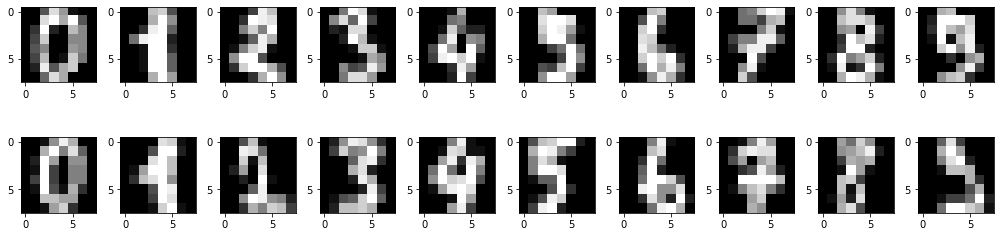

In [ ]:
fig, axes = plt.subplots(ncols=10, nrows=2, figsize=(14, 4))
for ax, img in zip(axes.ravel(), digits['images']):
    ax.imshow(img, cmap='gray')
fig.tight_layout()

You can see that the dataset contains 1797 images of size $8 \times 8$ pixels:

In [ ]:
digits['images'].shape

(1797, 8, 8)

We can extract the feature matrix and target labels as follows:

In [ ]:
X = digits.data
y = digits.target

X.shape, y.shape

((1797, 64), (1797,))

**TODO**: Now, in the code cell(s) below:

- Implement the one-hot encoder and apply it to the target labels
- Split the data 80/20 into train and test sets (you can use `sklearn.model_selection.train_test_split`)
- Change `fit` and `predict` so that you can fit the multi-class perceptron to the train data.
- Determine the perceptron's classification accuracy on both train and test data.

In [ ]:
... # TODO

## 2.3 Interpreting the Results (2 pts)

Is your perceptron overfitting or underfitting your data? Why?

---

**YOUR ANSWER HERE**

---

# 3. Perceptron: Feature Engineering (10 pts)

One way in which we could try to improve the performance of our perceptron is by feature engineering. This involves applying a preprocessing method to the images so that our perceptron does not operate on the raw pixel values.

**TODO**: In the code cells below, implement *one* of the feature detection/extraction methods that we have seen in class, explain why you picked that one (why do you think will it help the perceptron's performance?) and train your perceptron on it.

> *Hint*: You may want to check out [skimage.feature](https://scikit-image.org/docs/stable/api/skimage.feature.html) and [sklearn.preprocessing](https://scikit-learn.org/stable/modules/preprocessing.html). You can also use standard OpenCV functions.

In [ ]:
... # TODO

**TODO**: Calculate your perceptron's classification accuracy on train and test set.
- Did your performance go up/down and why do you think that is?
- Is your perceptron underfitting, overfitting, or just right?
- What else could you try to improve the perceptron's performance?

In [ ]:
... # TODO

---

**YOUR ANSWER HERE**

---